# SI 618 - Homework #4: Visualization, Correlation, and Linear Models

Version 2022.02.07.1.CT

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [ ]:
MY_UNIQNAME = 'kaiyanc'

## We will be using two different datasets for the two different parts of this homework. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

### <span style="color:magenta">  Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes for </span>

* Plot histograms for these metrics *for Canada*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for Canada*, as we did in this week's class. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
can = pd.read_csv('CAvideos.csv')
can.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


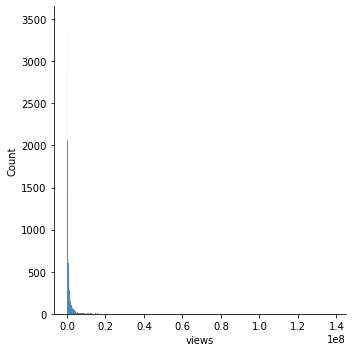

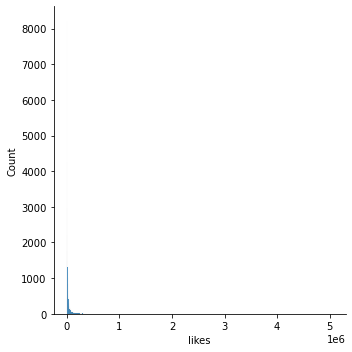

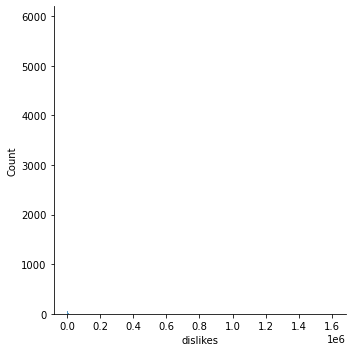

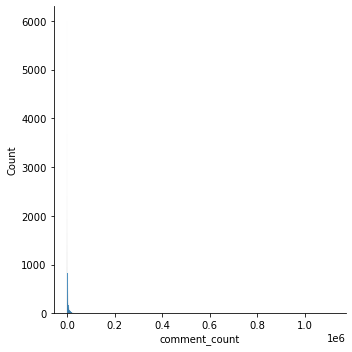

In [24]:
can = can.dropna(subset=['views', 'likes', 'dislikes', 'comment_count'])
sns.displot(can['views'])
sns.displot(can['likes'])
sns.displot(can['dislikes'])
sns.displot(can['comment_count'])
plt.show()

I use displot here, but not hist because I think they are actually the same, and the displot is more clear and beautiful.

All of the four plots have similar distribution, which is that s small part of the videos have very high views, likes, dislikes, and comments, while most of the vidoes have small views, likes, dislikes, and comments. In other words, the plots have a long tail.

In [150]:
can['log_views'] = np.log(can['views'])
can['log_likes'] = np.log(can['likes'])
can['log_dislikes'] = np.log(can['dislikes'])
can['log_comment_count'] = np.log(can['comment_count'])
can.head(5)

C:\Users\kaiya\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,log_views,log_likes,log_dislikes,log_comment_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,16.658009,13.576523,10.678675,11.743100
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,13.830055,11.758175,7.431300,9.475010
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,14.975981,11.891602,8.582794,9.009570
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,14.555459,11.792366,7.595387,9.770984
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,17.327761,14.306621,9.956175,11.351194


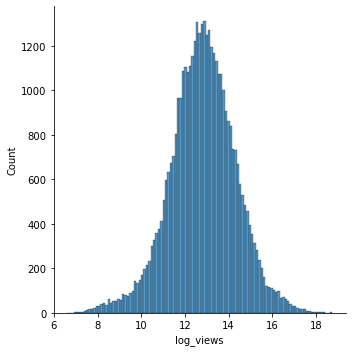

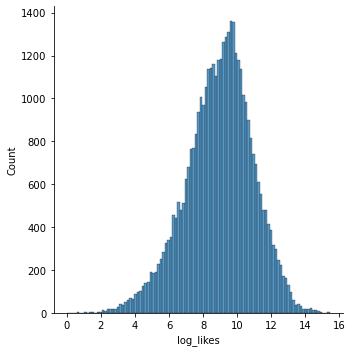

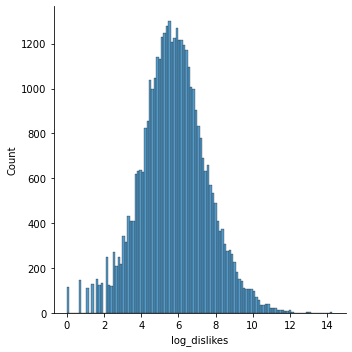

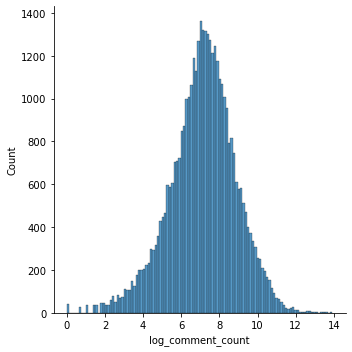

In [25]:
sns.displot(can['log_views'])
sns.displot(can['log_likes'])
sns.displot(can['log_dislikes'])
sns.displot(can['log_comment_count'])
plt.show()

After applying log transformation to the data, we can find that the four plots also have a similar distribution, which is the normal distribution.

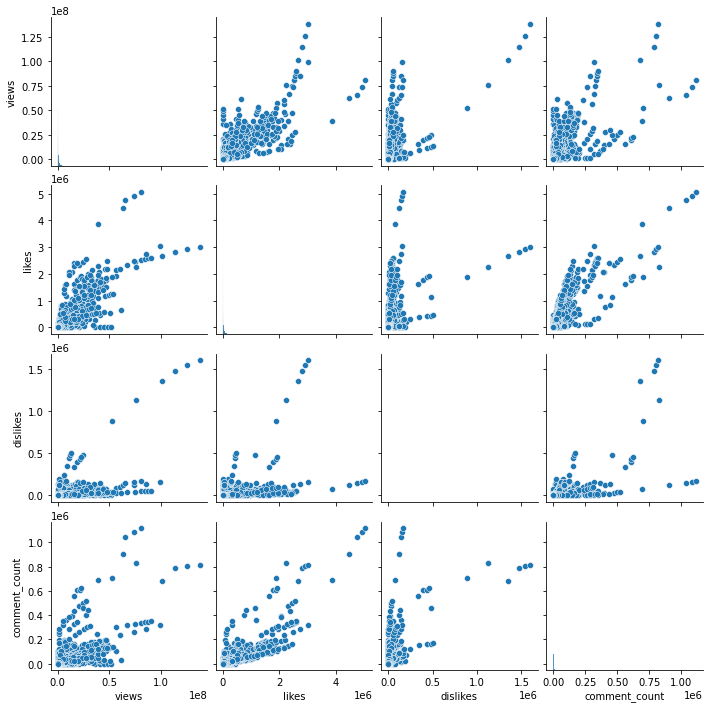

In [29]:
sns.pairplot(can[['views', 'likes', 'dislikes', 'comment_count']])
plt.show()

Interesting things:
* views seem to have a linear relationship with likes. The more views, the more likes it tends to be.
* comments also seem to have a linear relationship with likes. The more likes, the more comments it tend to be.
* likes and dislikes seem not to have a inverse relation, which means some videos have both high likes and high dislikes.

In [32]:
de = pd.read_csv('DEvideos.csv')
fr = pd.read_csv('FRvideos.csv')
gb = pd.read_csv('GBvideos.csv')
iN = pd.read_csv('INvideos.csv')
de = de.dropna(subset=['views', 'likes', 'dislikes', 'comment_count'])
fr = fr.dropna(subset=['views', 'likes', 'dislikes', 'comment_count'])
gb = gb.dropna(subset=['views', 'likes', 'dislikes', 'comment_count'])
iN = iN.dropna(subset=['views', 'likes', 'dislikes', 'comment_count'])

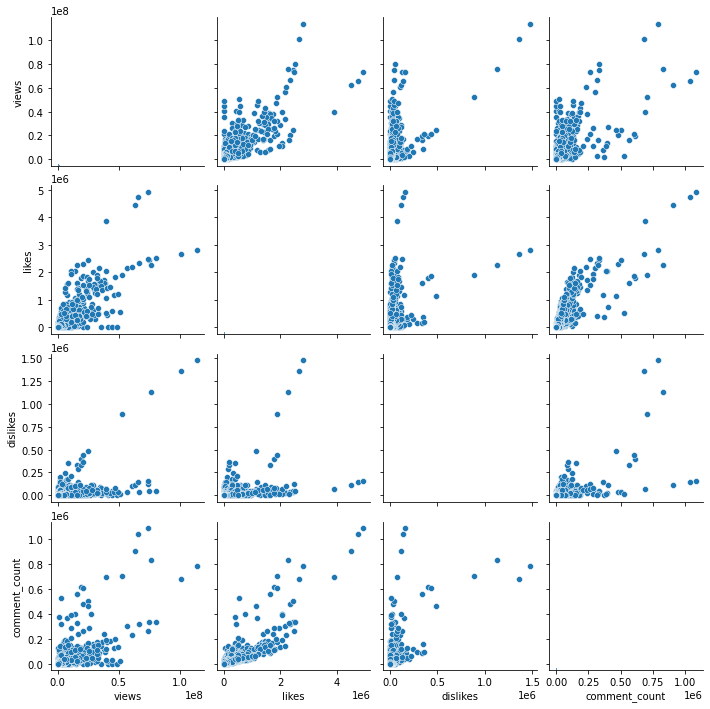

In [37]:
sns.pairplot(de[['views', 'likes', 'dislikes', 'comment_count']])

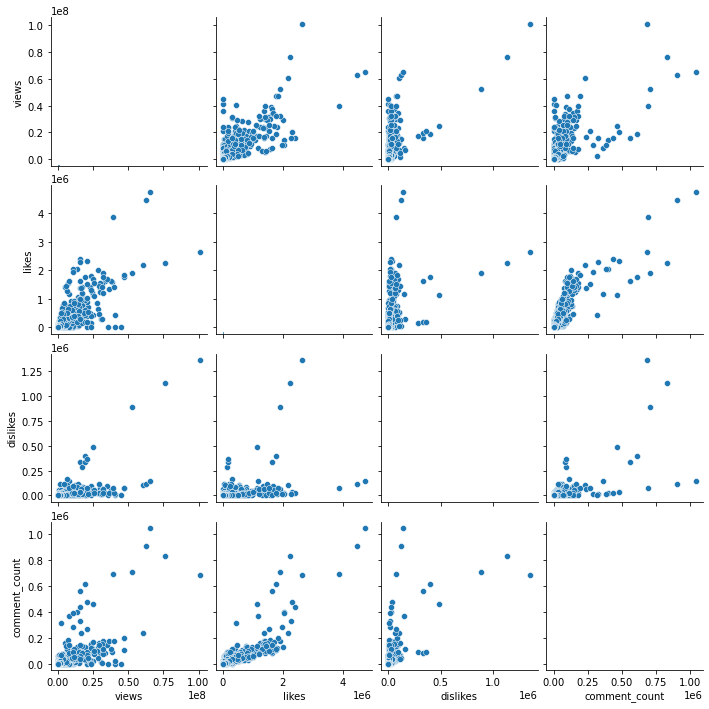

In [38]:
sns.pairplot(fr[['views', 'likes', 'dislikes', 'comment_count']])

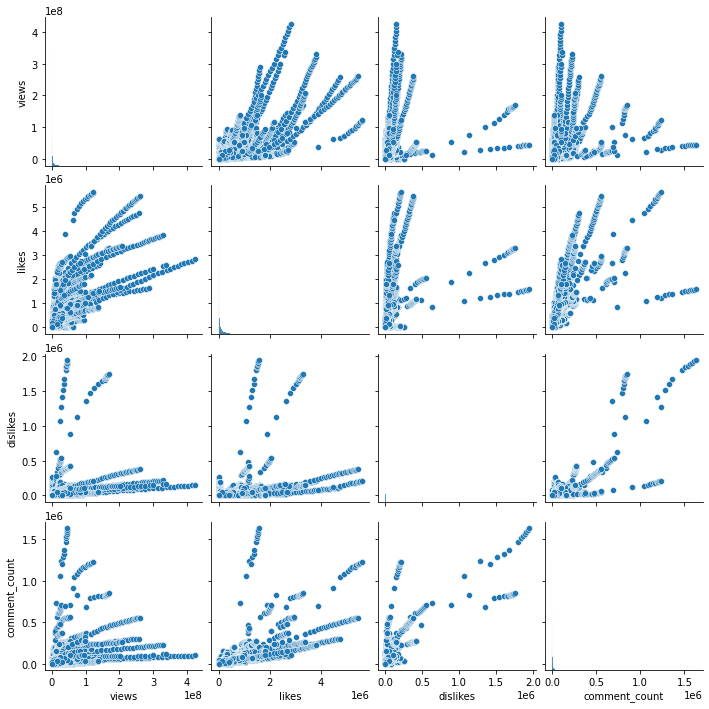

In [39]:
sns.pairplot(gb[['views', 'likes', 'dislikes', 'comment_count']])

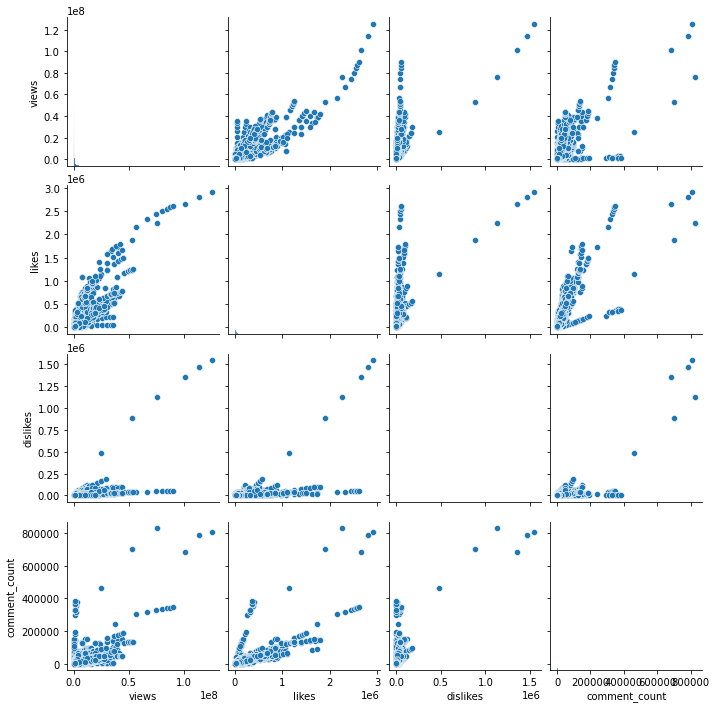

In [40]:
sns.pairplot(iN[['views', 'likes', 'dislikes', 'comment_count']])

The pairplots of the canada, German, India, and France look very similar to each other. The commons including:
* Like have a strong linear relationship with comments and views.
* Like does not have a clear inverse relation with dislike.\
For England, the pairplot looks a little different. All of the four features have a strong linear relationship with each other, which is very interesting.

### <span style="color:magenta"> Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice </span>

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Experiment with colormaps that are different from the default one and choose one that you think is best.  Comment on why you think so.
* Are there any interesting correlations? What are they?

In [48]:
can_num = can[['views', 'likes', 'dislikes', 'comment_count']]
cor = can_num.corr()
cor

,views,likes,dislikes,comment_count
views,1.000000,0.828964,0.557621,0.693107
likes,0.828964,1.000000,0.460427,0.836585
dislikes,0.557621,0.460427,1.000000,0.643494
comment_count,0.693107,0.836585,0.643494,1.000000


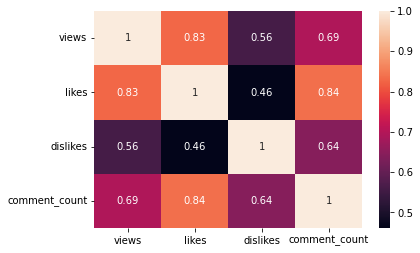

In [57]:
sns.heatmap(cor, annot=True)
plt.show()

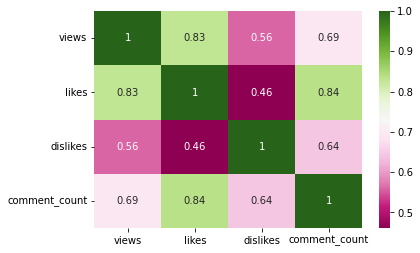

In [58]:
sns.heatmap(cor, annot=True, cmap="PiYG")
plt.show()

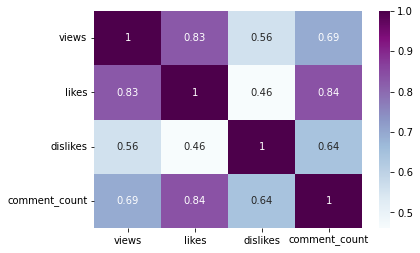

In [59]:
sns.heatmap(cor, annot=True, cmap="BuPu")
plt.show()

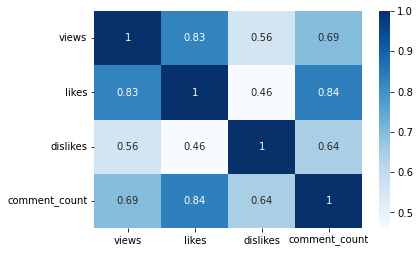

In [61]:
sns.heatmap(cor, annot=True, cmap="Blues")
plt.show()

I finnally choose the colormap Blues. The reason I choose this one because I think the shade of the color has a strong relationship with the numeric value. The darker the color is, the large the value is, which can help me to find the relatio of the heatmap more easily.

Just like what I have found from the pairplot. Views, likes, and comments have strong correlation with each other. Moreover, the correlation of comment and dislikes is also not small, which indicates that some of the comments may be negative. Besides, the correlation of likes and dislikes also have a value near 0.5, showing that different people may have differed favours.

### <span style="color:magenta"> Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice </span>
* Use statsmodels to perform an ANOVA (categorical regression) of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. Note that you need to use a categorical variable as your independent variable.
* Provide your interpretation of the results. 
* Create two different regression models where the dependent variable is the same, and the independent variables are different.  Note that your independent variable needs to be a continuous numerical variables. What does your interpretation say about the two models?

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
can.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,log_views,log_likes,log_dislikes,log_comment_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,16.658009,13.576523,10.678675,11.743100
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,13.830055,11.758175,7.431300,9.475010
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,14.975981,11.891602,8.582794,9.009570
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,14.555459,11.792366,7.595387,9.770984
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,17.327761,14.306621,9.956175,11.351194


In [66]:
smf.ols('views~category_id', can).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     812.6
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          5.32e-177
Time:                        16:22:23   Log-Likelihood:            -6.7232e+05
No. Observations:               40881   AIC:                         1.345e+06
Df Residuals:                   40879   BIC:                         1.345e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      2.6e+06   5.36e+04     48.500      0.000     2.5e+06    2.71e+06
category_id -6.987e+04   2451.205    -28.506      0.000   -7.47e+04   -6.51e+04
==============================================================================
Omnibus:                    75221.112   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        171986204.699
Skew:                          13.646   Prob(JB):                         0.00
Kurtosis:                     319.580   Cond. No.                         70.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I use the data of Canada, with views as the dependent variable and category_id as the independent variable. From the p-value, we can reject the null hypothesis that the variable is not statistically significant with alpha equal 0.025. In other words, the category of the videos do have a correlation with the views of the videos. 

In [69]:
like_view = smf.ols('likes~views', can).fit()
like_comment = smf.ols('likes~comment_count', can).fit()
print(like_view.summary())
print(like_comment.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                 8.980e+04
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:30:23   Log-Likelihood:            -5.1648e+05
No. Observations:               40881   AIC:                         1.033e+06
Df Residuals:                   40879   BIC:                         1.033e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2374.9879    387.484      6.129      0.0

The two models are respectively likes and views, and likes and comments.\
From the p-value of the independent variables of both of the two models, we can reject the null hypothesis that they are not statiscally significant, which means both views and comments have a strong relationship with the dependent varibale like.\
Moreover, from the coefficient, we can say that the more comments and views, the more the likes it would be.

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)* </span>
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### <span style="color:magenta"> Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). </span>

* Which pairs have the most/least correlation coefficients?

In [70]:
poke = pd.read_csv('Pokemon.csv')
poke.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


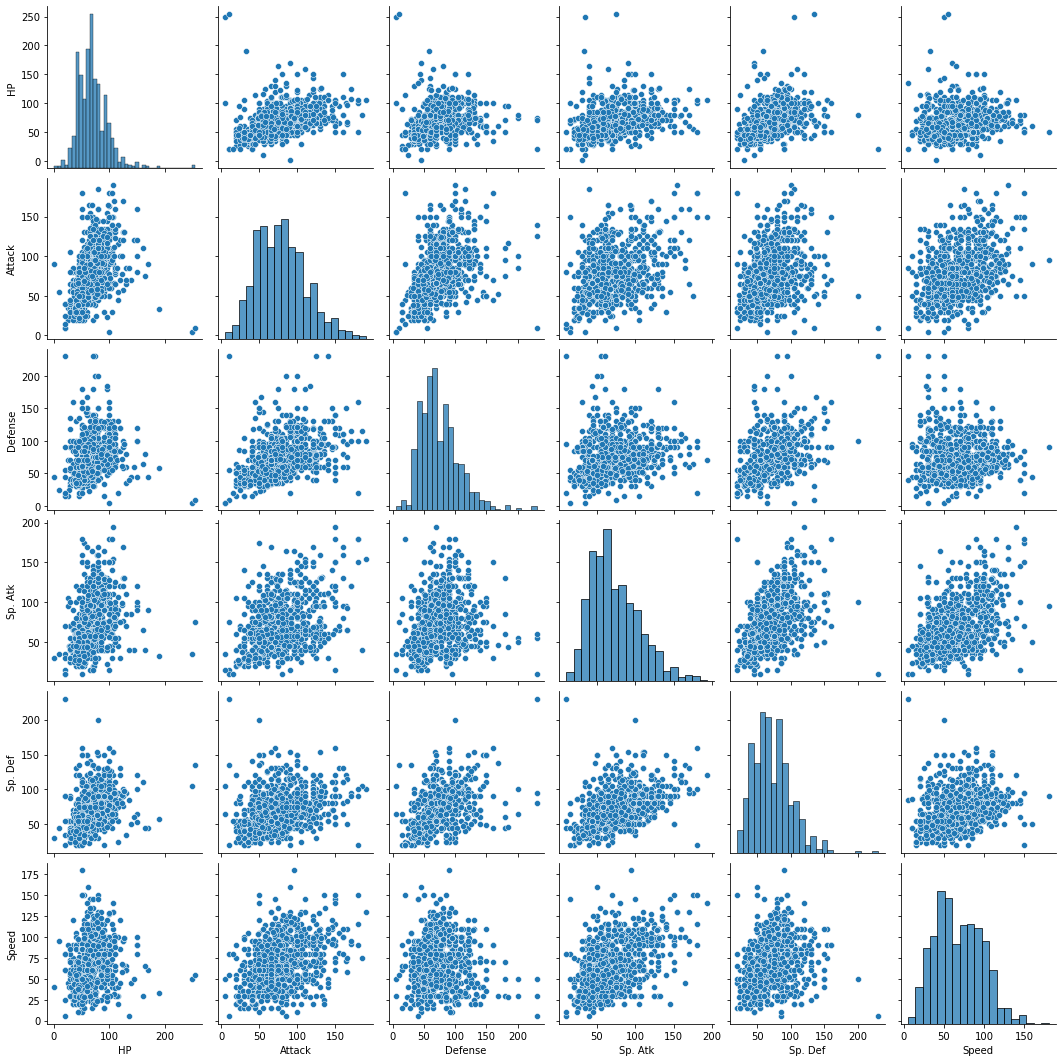

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


In [109]:
sns.pairplot(poke[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
plt.show()
poke[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()

From the pair plot, I could see strong correlations between attack and special attack, attack and speed, special defense and special defense, and special attack and speed. Weak correlation between speed and HP, and speed and special defend.\
I guess the pair with the most correlation coefficient may be attack and special attack. The pair with least correlation coefficient may be speed and Hp.\
From the correlation table, I can find that the most correlated pair is special defense and defense, the least correlated pair is Hp and speed, so I think I made a decent guess.

### <span style="color:magenta"> Q5. For 15 Points: Plot the distribution of ability points per Pokémon type </span>

* How would you describe each Pokémon type with different ability points?

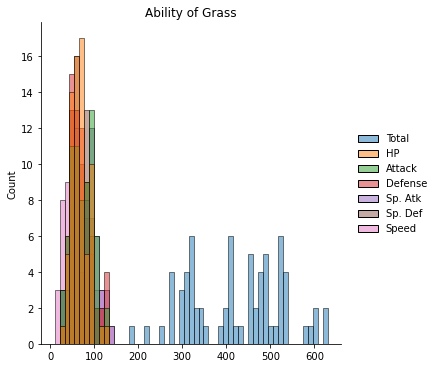

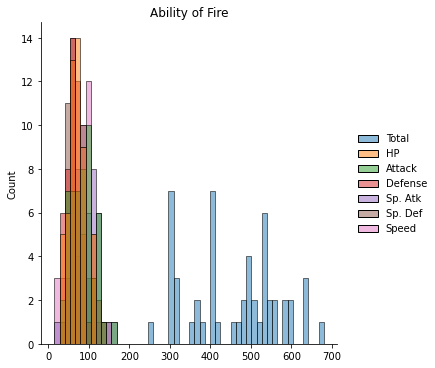

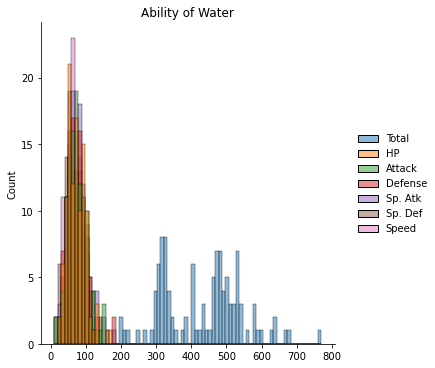

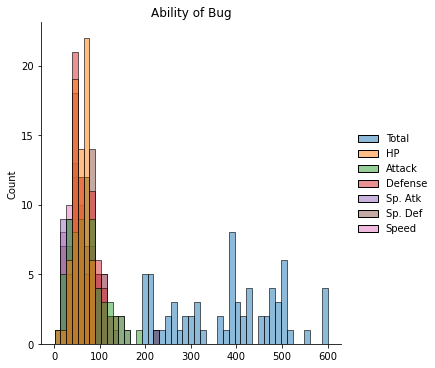

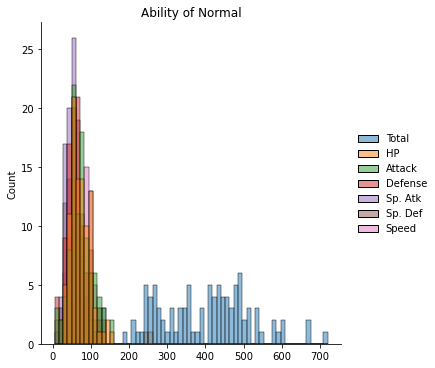

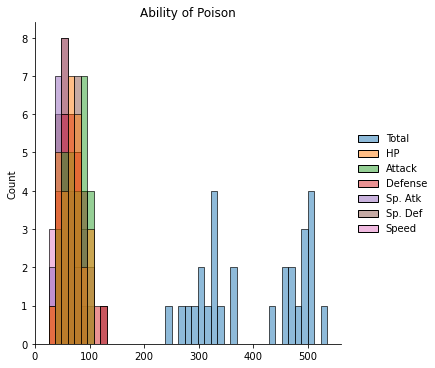

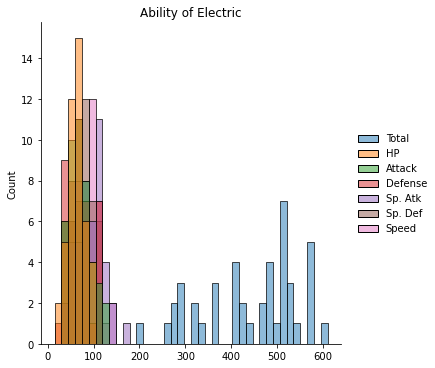

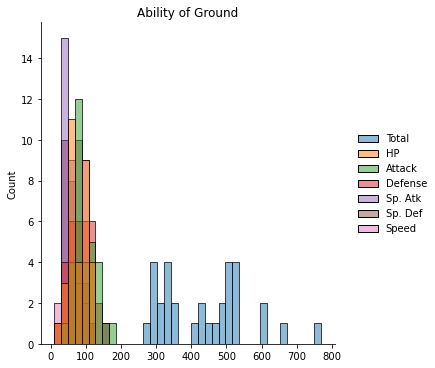

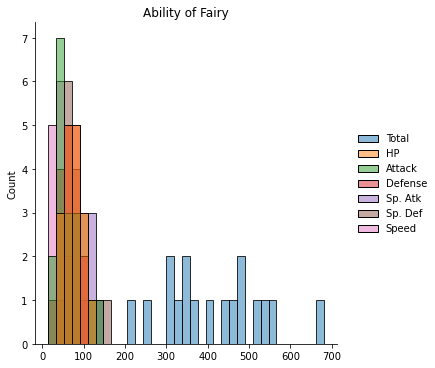

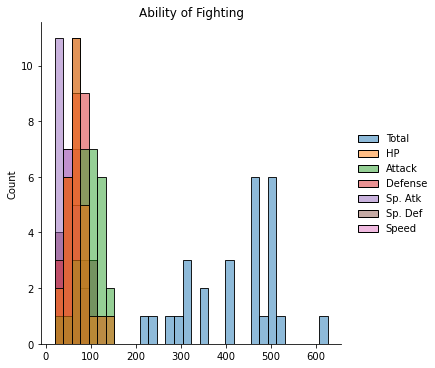

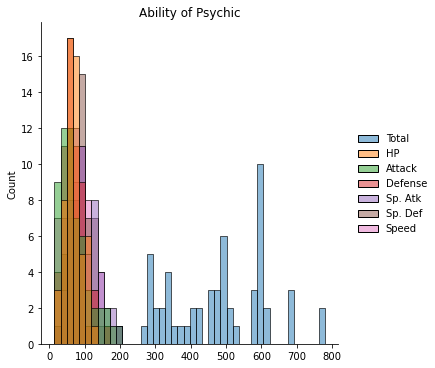

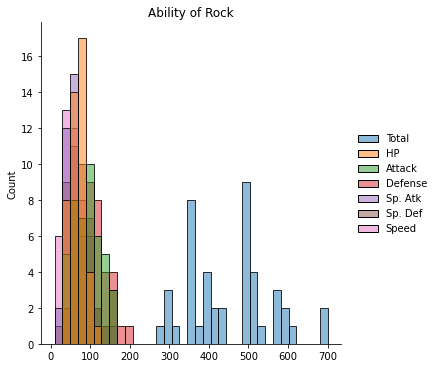

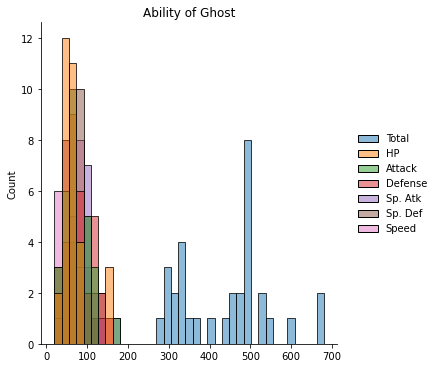

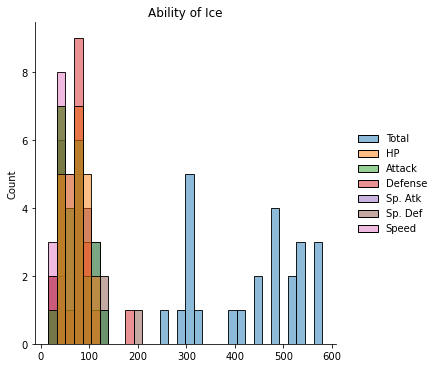

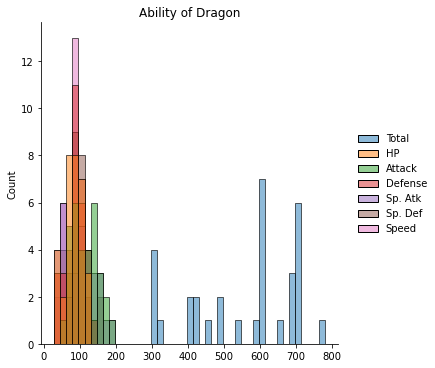

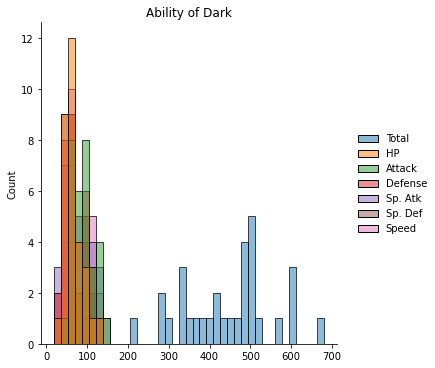

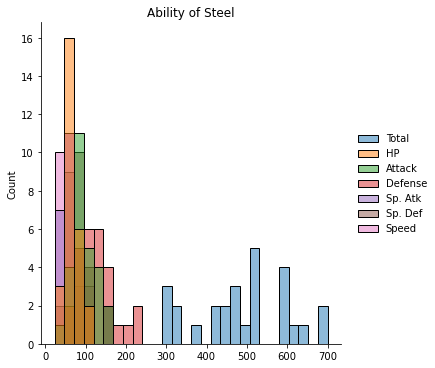

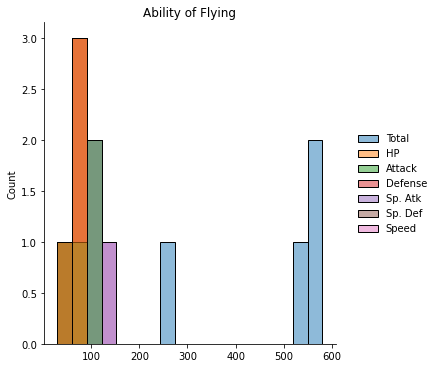

In [130]:
ability = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for Type in poke['Type 1'].unique():
        sns.displot(poke[poke['Type 1']==Type][ability]).set(title='Ability of ' + Type)

* Grass pokemon have high defense, decent HP and low speed. 
* Fire pokemon have high attack, decent speed and low defense.
* Water pokemon have high speed, decent attack and low special attack.
* Bug pokemon have high attack, decent special attack and low special defense.
* Normal pokemon have high HP, decent defense and low speed.
* Poison pokemon have high defense, decent attack and low speed.
* Electric pokemon have high special attack, decent speed and low HP.
* Ground pokemon have high attack, decent defense and low special attack.
* Fairy pokemon have high special defense, special attack and low speed.
* Fighting pokemon have high attack, decent speed, and low special attack.
* Psychic pokemon have high speed, decent special defense, and low attack.
* Rock pokemnn have high defense, decent speed, and low attack.
* Ghost pokemon have high HP, decent special attack, and low speed.
* Ice have high special defense, decent attack, and low speed.
* Dragon pokemon have high attack, decent special attack, and low defense.
* Dark pokemon have high attack, decent speed, and low defense.
* Steel pokemon have high defense, decnet attack, and low speed.
* Flying pokemon have high special attack, decent Hp, and low special defense..

### <span style="color:magenta"> Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other? </span>

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

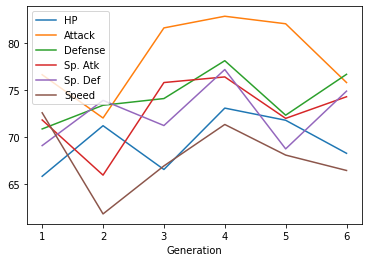

In [143]:
poke.groupby('Generation').mean().drop(['#', 'Total', 'Legendary'],axis=1).plot()
plt.show()

First, I check the change of the ability points of different generation by ploting the line of mean value of ability points of each generation. I find that attack, speed and special attack have a decrease from 1 to 2, while the other ability have a increas. All of the ability points have an increase for generation 4, and have decrease for the next 2 gemeration. I think from this plot, we can initially say that the designers tried to address the distribution of ability points.

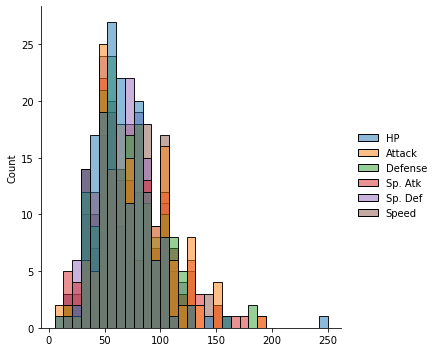

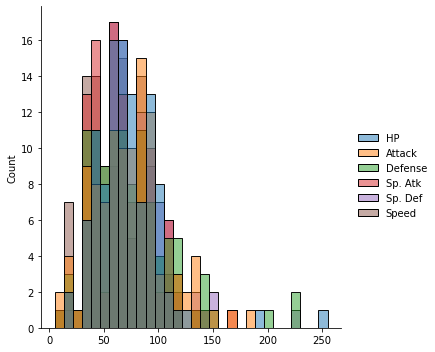

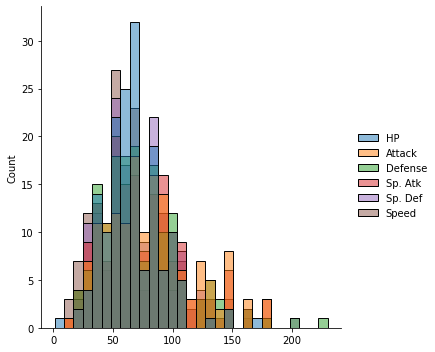

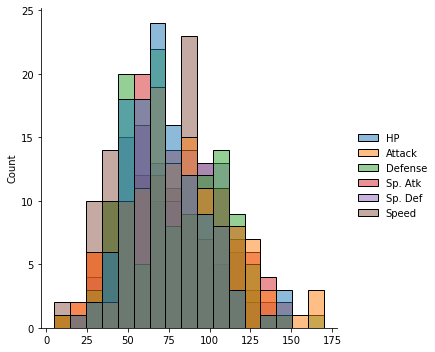

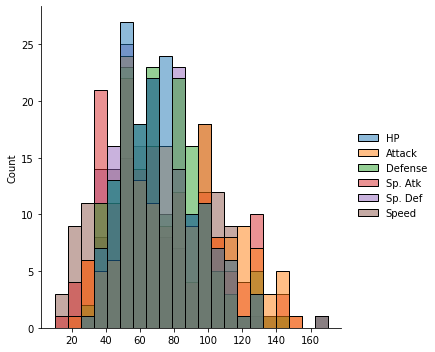

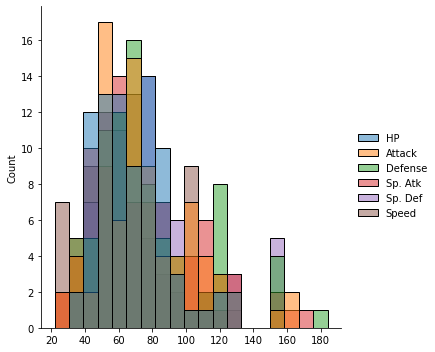

In [149]:
ability = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
poke['Generation'].unique()
for gen in poke['Generation'].unique():
        sns.displot(poke[poke['Generation']==gen][ability])

By ploting a more detailed distribution of ability points for the six generation, we can also view the change the designers want to do. For example, for generation 3 and 4, all of ability have a decrease which make the mean value of the plot have right transfer.\
Besides, we can also see that the designers tried to decrease the number of outliers from generation to generation. For the first several generations, we can find outliers with very large HP or defense, but for the later generations, this problem seem to be solved, and the overall distribution is more like a normal distribution.

(Use this space to explain your answers)